<a href="https://colab.research.google.com/github/rishabhgoel760/Airbnb-Smart-Pricing-Customer-Churn-Prediction---ML/blob/main/Part_A_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, root_mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# 1. Data Exploration and Preprocessing

Load the dataset Airbnb_data


In [2]:
df = pd.read_csv("/content/drive/MyDrive/Internshala/Course Resource/Airbnb_data - airbnb_data.csv")
df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [3]:
df.shape

(74111, 29)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

In [5]:
df.describe()


,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,7.411100e+04,74111.000000,74111.000000,73911.000000,74111.000000,74111.000000,74111.000000,57389.000000,74020.000000,73980.000000
mean,1.126662e+07,4.782069,3.155146,1.235263,38.445958,-92.397525,20.900568,94.067365,1.265793,1.710868
std,6.081735e+06,0.717394,2.153589,0.582044,3.080167,21.705322,37.828641,7.836556,0.852143,1.254142
min,3.440000e+02,0.000000,1.000000,0.000000,33.338905,-122.511500,0.000000,20.000000,0.000000,0.000000
25%,6.261964e+06,4.317488,2.000000,1.000000,34.127908,-118.342374,1.000000,92.000000,1.000000,1.000000
50%,1.225415e+07,4.709530,2.000000,1.000000,40.662138,-76.996965,6.000000,96.000000,1.000000,1.000000
75%,1.640226e+07,5.220356,4.000000,1.000000,40.746096,-73.954660,23.000000,100.000000,1.000000,2.000000
max,2.123090e+07,7.600402,16.000000,8.000000,42.390437,-70.985047,605.000000,100.000000,10.000000,18.000000


**Trend Analysis:**

   **Price Trends:**

<Axes: >

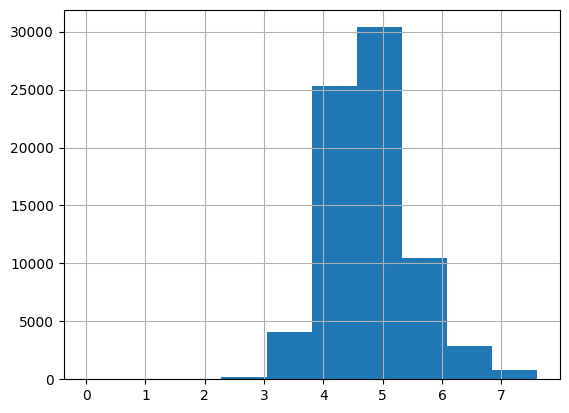

In [7]:
df['log_price'].hist() #Visualize the distribution of log prices.
# Price Range Varies from 0 to 7.6 in that maximum number of entries are in the range of 4 to 5.3 log_price

<Axes: xlabel='property_type'>

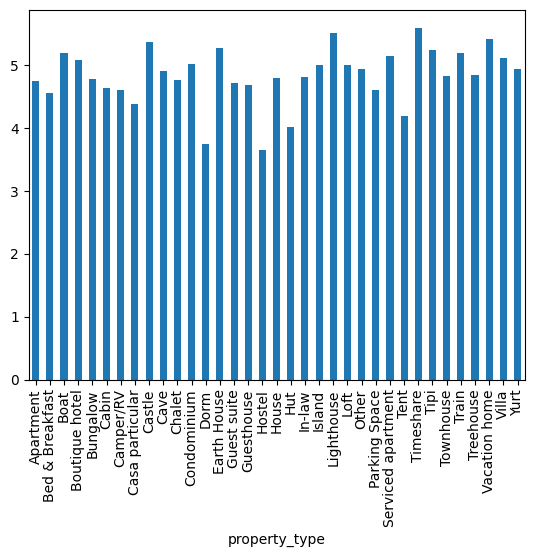

In [8]:
df.groupby('property_type')['log_price'].mean().plot(kind='bar') #Average price by property type.
# It shows that the average Price for castle, island, lighthouse and vaccation home is the highest

<Axes: xlabel='room_type'>

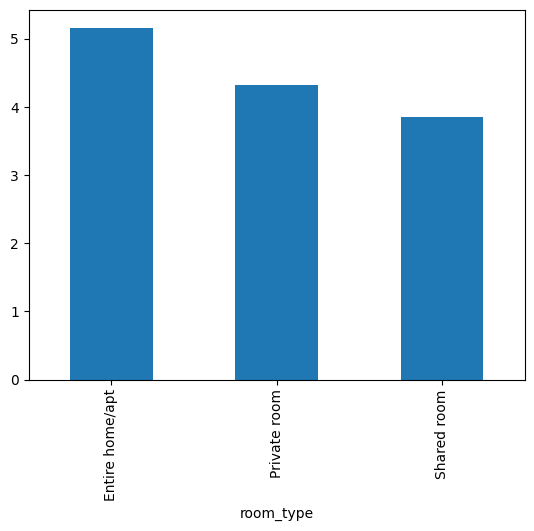

In [9]:
df.groupby('room_type')['log_price'].mean().plot(kind='bar') #Average price by room type.
# It shows that the average price for entire hime/ apt is higher as compared to private rooms or shared rooms

Text(0, 0.5, 'log_price')

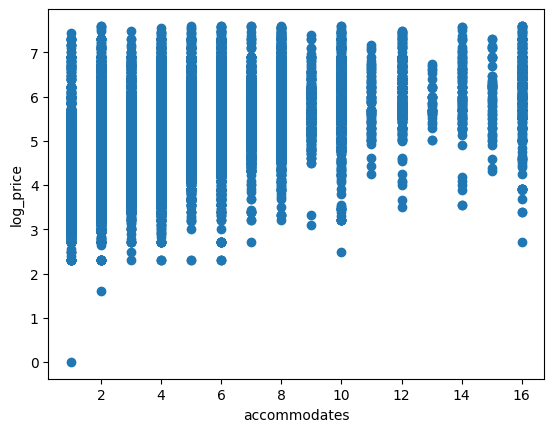

In [10]:
plt.scatter(x='accommodates', y='log_price', data = df) #Relationship between accommodation capacity and price.
plt.xlabel("accommodates")
plt.ylabel("log_price")
# It shows that the price value vary very significantly for smaller values of accommmodation but as we go
# for higher accommodation values we have limited options available which is neither too high nor too low.


<function matplotlib.pyplot.show(close=None, block=None)>

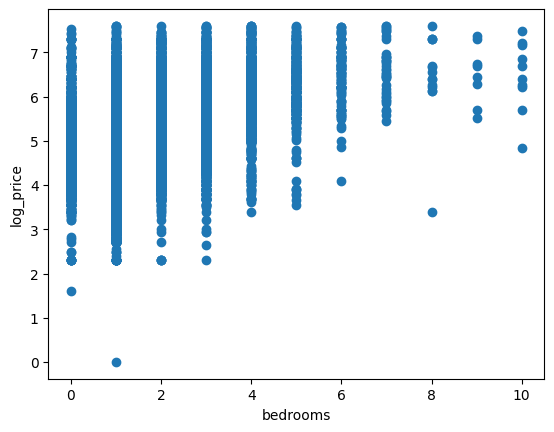

In [11]:
plt.scatter(x='bedrooms', y='log_price', data=df) #Relationship between bedrooms and price.
plt.ylabel('log_price')
plt.xlabel('bedrooms')
plt.show
# we have maximum number of price range is for 1 bedroom but as we go higher in number of bedrooms we see the price got stabalized having less nu
# of entries in that case.


<Axes: xlabel='latitude', ylabel='longitude'>

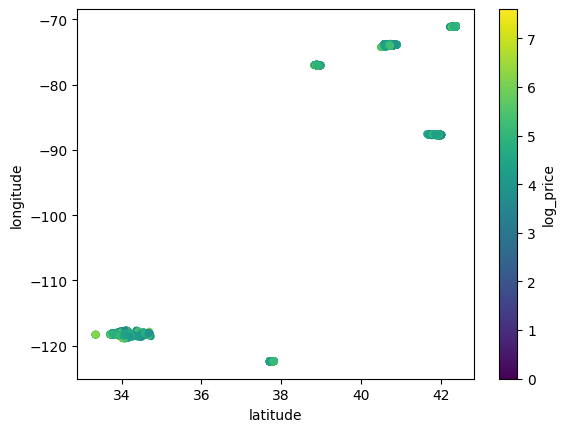

In [12]:
df.plot.scatter(x='latitude', y='longitude', c='log_price', cmap='viridis') #Geographic price distribution.


<Axes: xlabel='number_of_reviews', ylabel='review_scores_rating'>

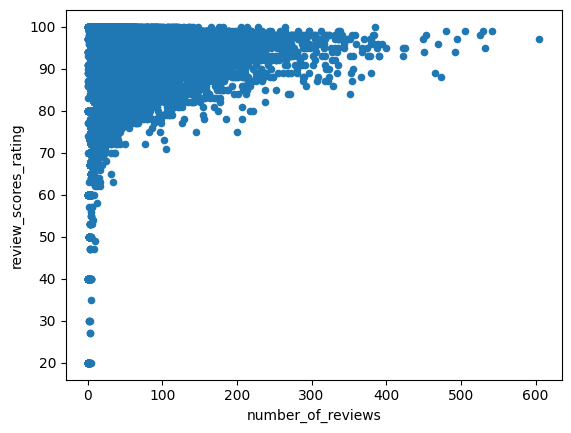

In [13]:
df.plot.scatter(x='number_of_reviews', y='review_scores_rating') #relationship between reviews and rating.

<Axes: xlabel='bathrooms', ylabel='log_price'>

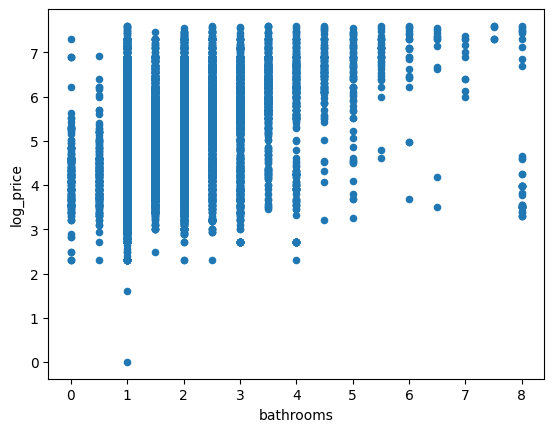

In [14]:
df.plot.scatter(x='bathrooms', y='log_price') #Relationship between bathrooms and price.
# Maximum variation in price range is in the case of 1 to 3 batthrrom other than that we have less options in price range as well as the
# number of entries available.

<Axes: xlabel='property_type'>

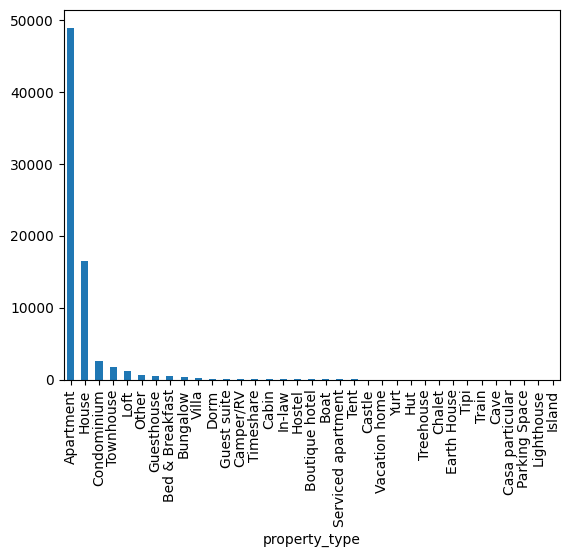

In [15]:
df['property_type'].value_counts().plot(kind='bar') #Distribution of property types.
# We have maiximum numbers of apartments available rest we have very minimum property types.

<Axes: xlabel='room_type'>

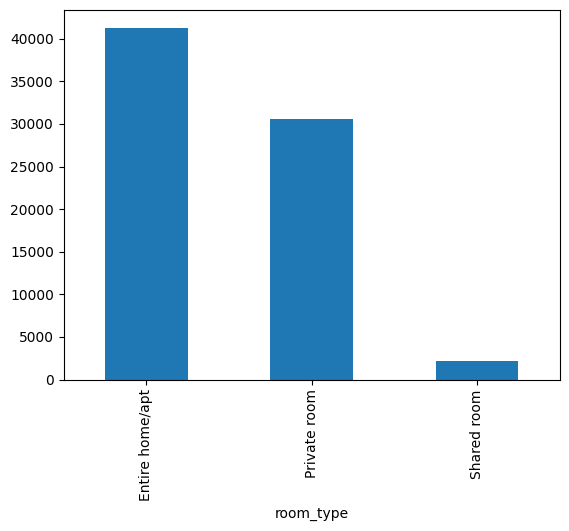

In [16]:
df['room_type'].value_counts().plot(kind='bar') #Distribution of room types.
# The number of Entire home/ apt are much more in numbers as compared to shared rooms but considerabely higher than the private rooms

<Axes: xlabel='cancellation_policy'>

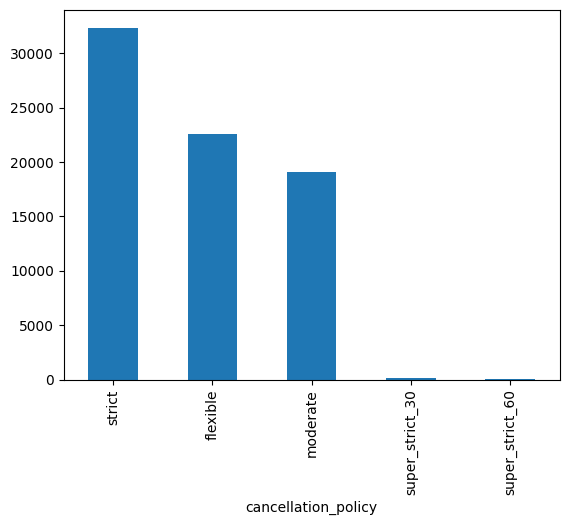

In [17]:
df['cancellation_policy'].value_counts().plot(kind='bar') #Distribution of cancellation policies.
# we have maximum numbers of strict canellation policy, then we have flexible and than moderate showing that
# we have neither too strict i.e. super strict policy nor too flexible cancellation policy

<Axes: xlabel='bed_type'>

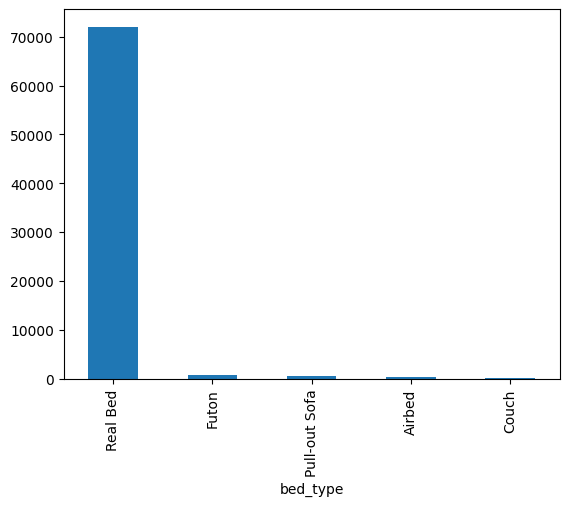

In [18]:
df['bed_type'].value_counts().plot(kind='bar') #Distribution of bed types.
# This showes a highely biased result for the real bedding.

<Axes: xlabel='neighbourhood'>

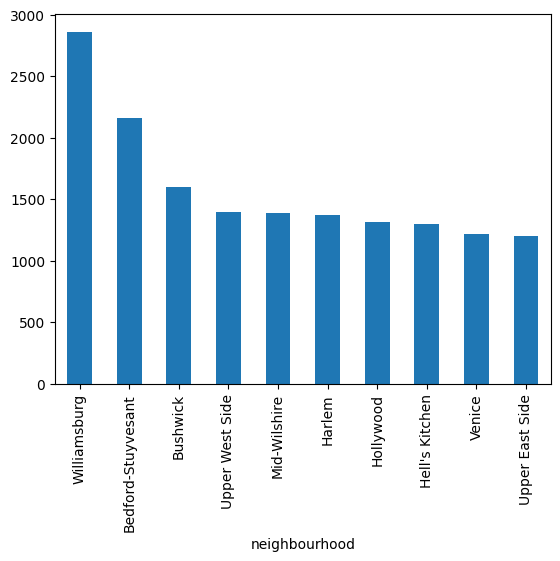

In [19]:
df['neighbourhood'].value_counts().head(10).plot(kind='bar') #Most common neighborhoods.
# This plot represents that the popularity of williamsberg neighbourhood is much more higher as compared to other neighbourhood

# 2. Handling Missing Values

Identify Missing Values:

In [20]:
df.isnull().sum() #Count missing values in each column.


,0
id,0
log_price,0
property_type,0
room_type,0
amenities,0
accommodates,0
bathrooms,200
bed_type,0
cancellation_policy,0
cleaning_fee,0


In [23]:
# Dropping ccolumns having vaery high missing values
df.drop(df[['description','first_review','host_response_rate','last_review','review_scores_rating','thumbnail_url','zipcode']], axis=1, inplace=True)

In [24]:
# Replacing missing values with median beaause median is more robust to outliers
df[['bedrooms','beds','bathrooms']] = df[['bedrooms','beds','bathrooms']].fillna(df[['bedrooms','beds','bathrooms']].median())

In [25]:
#dropping misssing rows
df.dropna(subset=['host_has_profile_pic','host_identity_verified','host_since'], inplace=True)

In [26]:
#rplacing blank values with unknown
df['neighbourhood'].fillna('Unknown', inplace=True)

<ipython-input-26-e91baf87d3bc>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['neighbourhood'].fillna('Unknown', inplace=True)


In [27]:
df.isnull().sum()

,0
id,0
log_price,0
property_type,0
room_type,0
amenities,0
accommodates,0
bathrooms,0
bed_type,0
cancellation_policy,0
cleaning_fee,0


In [28]:
num_col=df.dtypes[df.dtypes!='object'].index
num_col

Index(['id', 'log_price', 'accommodates', 'bathrooms', 'cleaning_fee',
       'latitude', 'longitude', 'number_of_reviews', 'bedrooms', 'beds'],
      dtype='object')

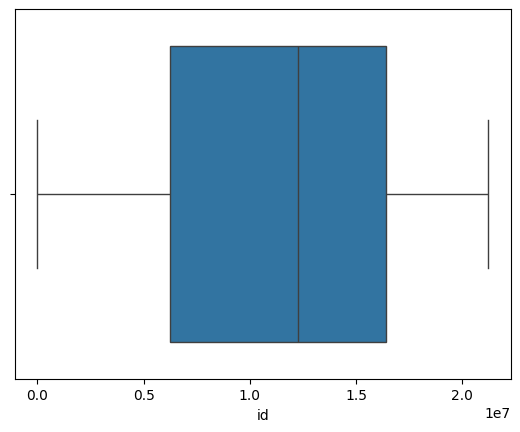

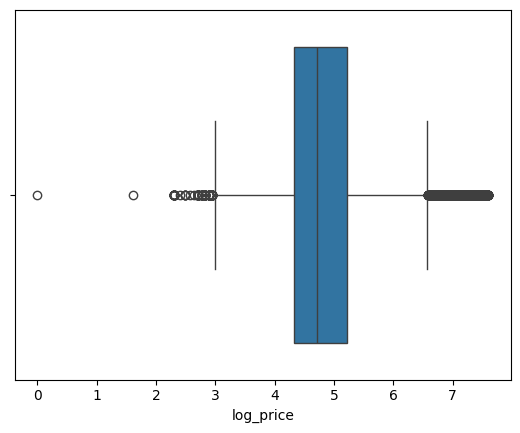

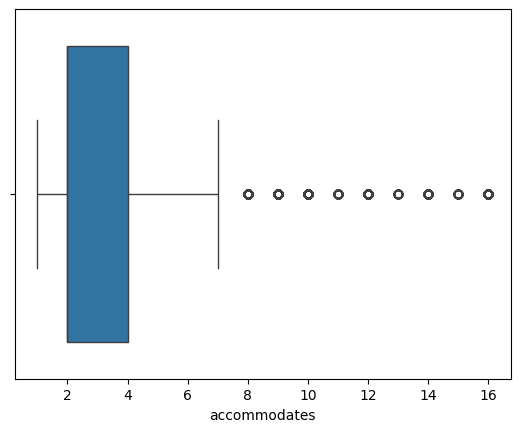

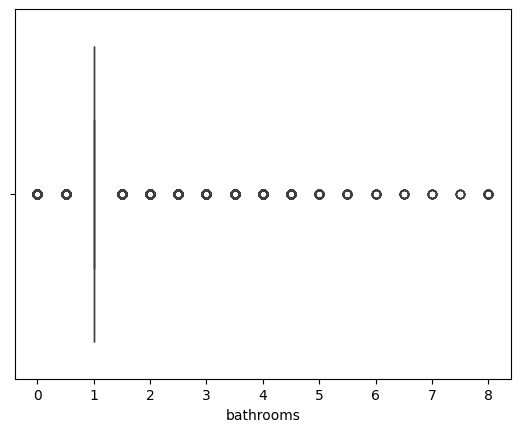

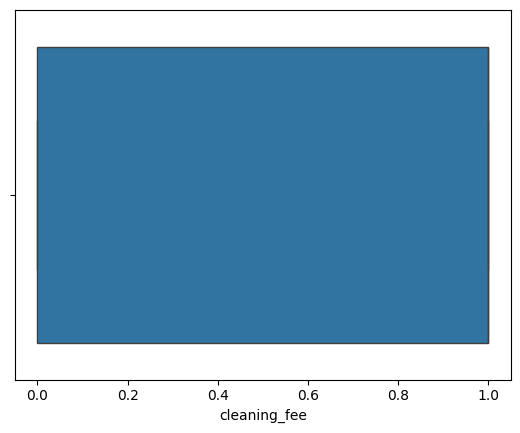

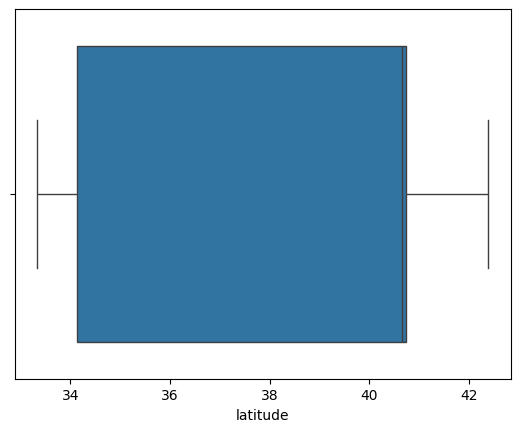

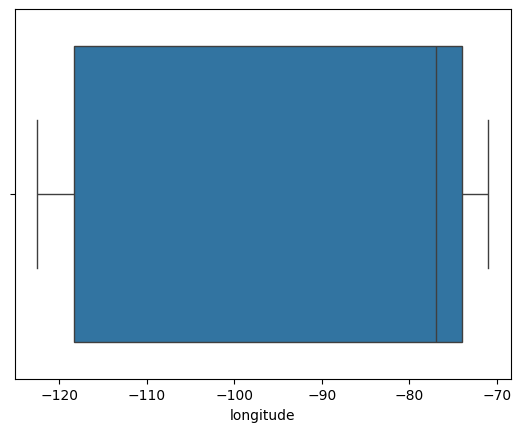

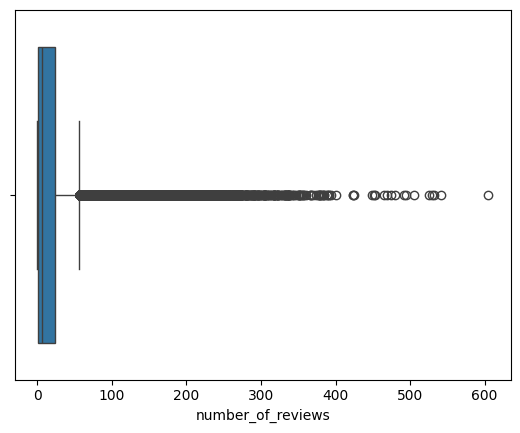

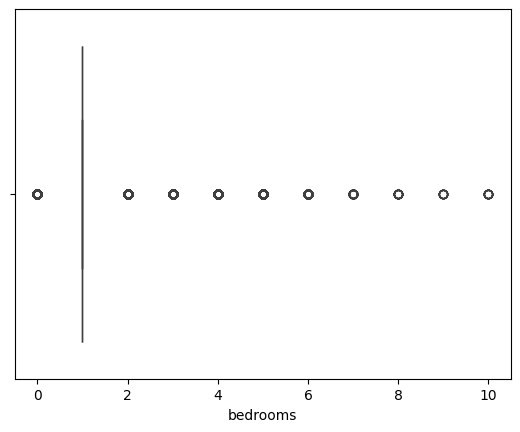

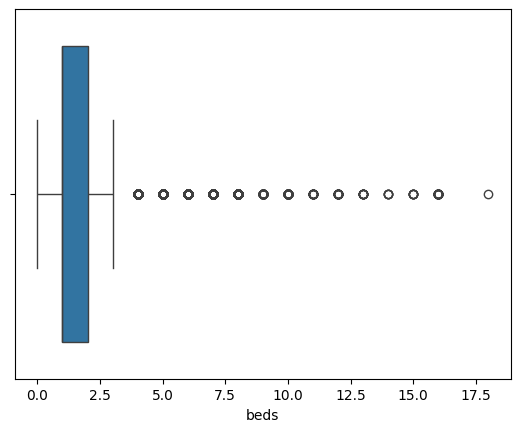

In [30]:
# Ploting boxplot to check for the outliers in the non object data type variables.
for i in num_col:
  sns.boxplot(x=df[i])
  plt.show()

In [32]:
# In this step we are trying to remove the outliers from our dataset.
def remove_outliers(df,column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3-Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

df = remove_outliers(df, "log_price")
df = remove_outliers(df, "accommodates")
df = remove_outliers(df, "bedrooms")
df = remove_outliers(df, "bathrooms")
df = remove_outliers(df, "beds")
#checking the shape post ouliers removal
df.shape

(34466, 22)

# 4. Feature Engineering


Categorical Encoding:

In [33]:
# All those variables that have the string data type, using label encoder function we are encodding them in integer datatye
#i.e. in 0,1,2....etc.
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['room_type_encoded'] = encoder.fit_transform(df['room_type'])
df['property_type_encoded'] = encoder.fit_transform(df['property_type'])
df['amenities_encoded'] = encoder.fit_transform(df['amenities'])
df['bed_type_encoded'] = encoder.fit_transform(df['bed_type'])
df['neighbourhood_encoded'] = encoder.fit_transform(df['neighbourhood'])
df['cancellation_policy_encoded'] = encoder.fit_transform(df['cancellation_policy'])

Create price per person column:

In [34]:
# I created this column in order to check the price of the property for per person.
df['price_per_person'] = df['log_price'] / df['accommodates']
# create column for number of amenities
df['num_amenities'] = df['amenities'].apply(lambda x: len(x.split(',')) if isinstance(x, str) else 0)
# checking the changes
df[['amenities', 'num_amenities']].head()

,amenities,num_amenities
0,"{""Wireless Internet"",""Air conditioning"",Kitche...",9
5,"{TV,""Wireless Internet"",Heating,""Smoke detecto...",10
6,"{TV,Internet,""Wireless Internet"",""Air conditio...",21
7,"{TV,""Cable TV"",""Wireless Internet"",""Wheelchair...",26
8,"{TV,""Cable TV"",""Wireless Internet"",""Pets live ...",21


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34466 entries, 0 to 74106
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           34466 non-null  int64  
 1   log_price                    34466 non-null  float64
 2   property_type                34466 non-null  object 
 3   room_type                    34466 non-null  object 
 4   amenities                    34466 non-null  object 
 5   accommodates                 34466 non-null  int64  
 6   bathrooms                    34466 non-null  float64
 7   bed_type                     34466 non-null  object 
 8   cancellation_policy          34466 non-null  object 
 9   cleaning_fee                 34466 non-null  bool   
 10  city                         34466 non-null  object 
 11  host_has_profile_pic         34466 non-null  object 
 12  host_identity_verified       34466 non-null  object 
 13  host_since           

In [36]:
# calculating neighbourhood popularity so that we can see that weather it influences the price of the property or not.
neighborhood_popularity = df.groupby('neighbourhood').agg(
listing_count=('id', 'count'),
total_reviews=('number_of_reviews', 'sum')
).sort_values(by='total_reviews', ascending=False)
print(neighborhood_popularity)

                    listing_count  total_reviews
neighbourhood                                   
Unknown                      3289          48063
Williamsburg                 1714          29102
Hell's Kitchen                617          17004
Bedford-Stuyvesant           1066          16146
Venice                        429          15945
...                           ...            ...
Huguenot                        1              0
La Habra                        1              0
Vernon                          1              0
Watts                           1              0
Bergen Beach                    2              0

[557 rows x 2 columns]


In [37]:
#convert boolean column into numeric(1 and 0)
bool_cols= ['host_has_profile_pic','host_identity_verified','instant_bookable']
df[bool_cols] = df[bool_cols].replace({'t' : 1, 'f' : 0})

<ipython-input-37-a23cfe59de65>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[bool_cols] = df[bool_cols].replace({'t' : 1, 'f' : 0})


In [38]:
num_col_1=df.dtypes[df.dtypes!='object'].index
num_col_1

Index(['id', 'log_price', 'accommodates', 'bathrooms', 'cleaning_fee',
       'host_has_profile_pic', 'host_identity_verified', 'instant_bookable',
       'latitude', 'longitude', 'number_of_reviews', 'bedrooms', 'beds',
       'room_type_encoded', 'property_type_encoded', 'amenities_encoded',
       'bed_type_encoded', 'neighbourhood_encoded',
       'cancellation_policy_encoded', 'price_per_person', 'num_amenities'],
      dtype='object')

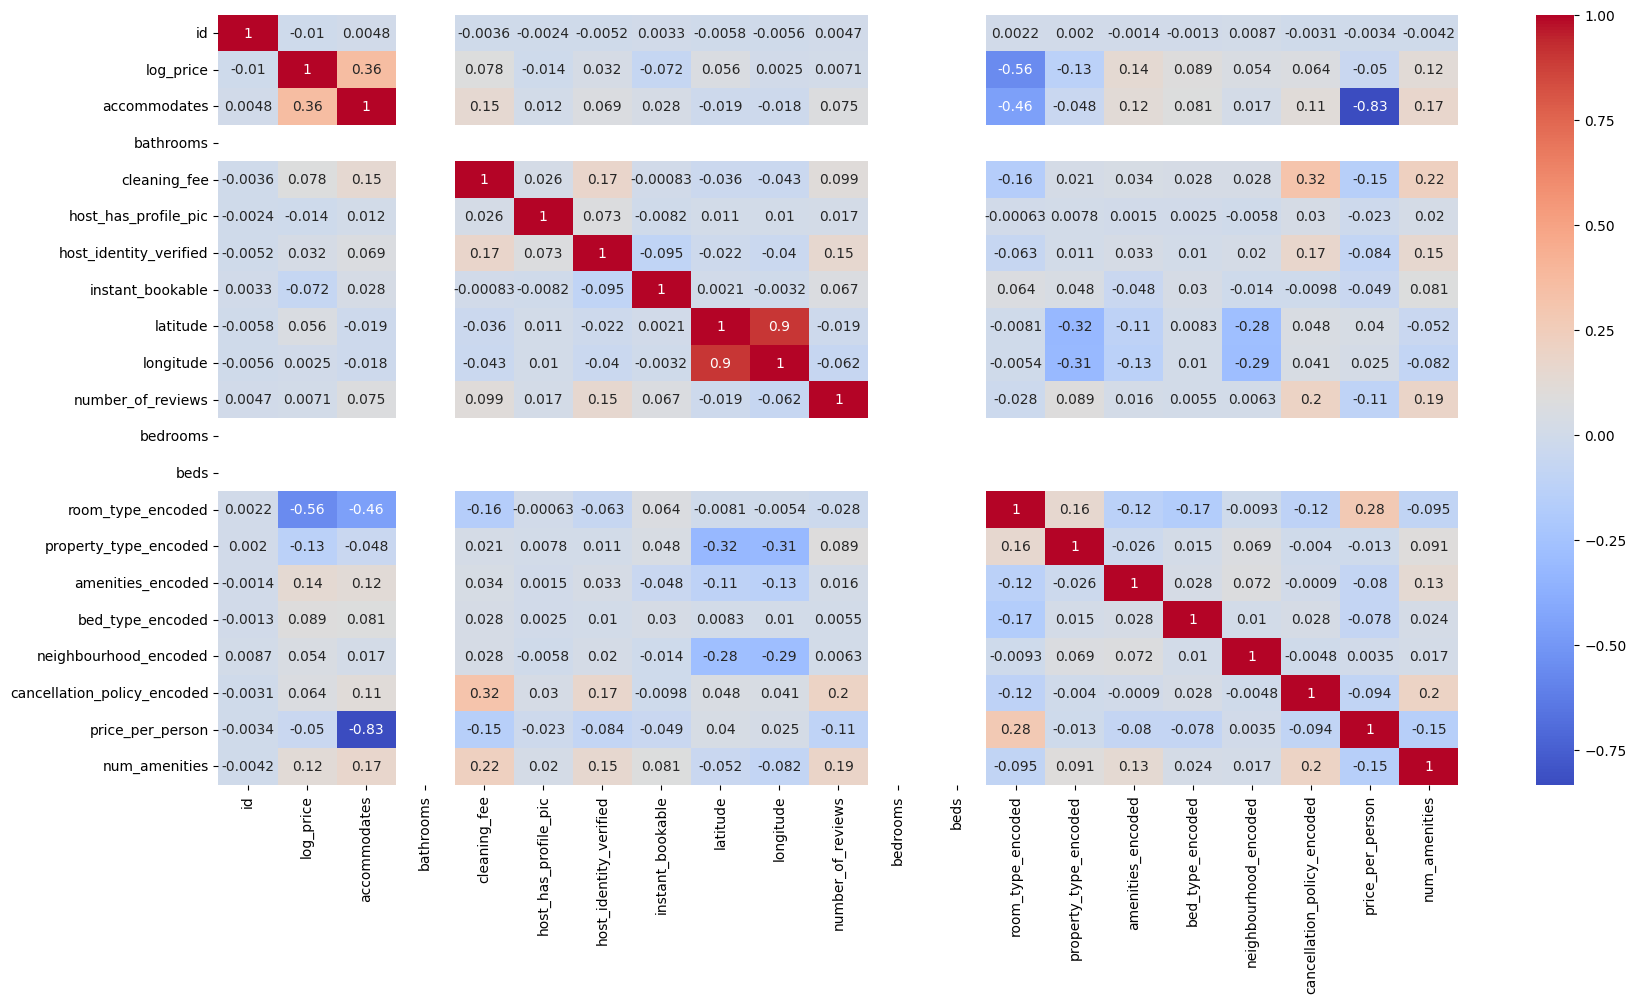

In [39]:
selected = df[num_col_1]
corr = selected.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.rc('ytick', labelsize=8)
plt.show()
# Using this correlation matrix we can see the relationship that exist between the variables that we have in the dataset
# We can see that log_price and accommodates have a postive relationship and also with ammenities.

# 5.1 Model Development

In [46]:
# Define Target variables
y=df['log_price']
x=df.drop(columns=['log_price','id','name','property_type','room_type','amenities','bed_type','host_since','neighbourhood','cancellation_policy', 'city'])

# Split the dataset into training and testing split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

#checking th shape of train and test dataset
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(25849, 19)
(8617, 19)
(25849,)
(8617,)


**Linear Regression model**

In [47]:
m1 = LinearRegression()
m1.fit(x_train,y_train)

LinearRegression()

**Model Evaluation**

In [48]:
# Model score - R2_Score
print('Training Score',m1.score(x_train,y_train))
print('Testing Score',m1.score(x_test,y_test))
# we can see that the difference between the training and testing score is very less which depicts less
# chances for overfitting but there is a possibility og underfitting using this algorithm.

Training Score 0.48474503145881687
Testing Score 0.4953061344268911


In [49]:
y_pred = m1.predict(x_test)
y_pred

array([4.70878182, 4.8124469 , 4.25476321, ..., 4.45520688, 4.60051834,
       5.42248202])

In [50]:
#Evaluate the model
print(f" Mean Squared error: {mean_squared_error(y_test,y_pred) * 100:.2f}%")
print(f" Mean Absolute error: {mean_absolute_error(y_test,y_pred)*100:.2f}%")
print(f" Root Mean Squared error: {root_mean_squared_error(y_test,y_pred)*100:.2f}%")
print(f" R2 score: {r2_score(y_test,y_pred)*100:.2f}%")
# MSE, MAE, RMSE values are higher while the value of r2_score is lower showing a less atring model.


 Mean Squared error: 15.13%
 Mean Absolute error: 30.07%
 Root Mean Squared error: 38.89%
 R2 score: 49.53%


**Model Development**

**DecisionTree Model**

In [51]:
decision_tree = DecisionTreeRegressor()
decision_tree.fit(x_train,y_train)
decision_tree_pred = decision_tree.predict(x_test)

**Model Evaluation**

In [52]:
#printing the values of evaluation of model
print(f"Decision Tree Mean Squared error: {mean_squared_error(y_test, decision_tree_pred)*100:.2f}%")
print(f'Decision Tree Mean Absolute error: {mean_absolute_error(y_test, decision_tree_pred)*100:.2f}%')
print(f'Decision Tree Mean Absolute error: {mean_absolute_error(y_test, decision_tree_pred)*100:.2f}%')
print(f"Decision Tree R2 score: {r2_score(y_test, decision_tree_pred)*100:.2f}%")
# It showes that we have very less error with the training dataset and higher r2_score value showes us that
# there is a very high possibility of overfitting in this model.

Decision Tree Mean Squared error: 0.05%
Decision Tree Mean Absolute error: 0.15%
Decision Tree Mean Absolute error: 0.15%
Decision Tree R2 score: 99.82%


In [53]:
#Since the value of r2 score is vary high so it can be a case of overfitting.
#So to lessen the overfitting we can optemize the model
from sklearn.metrics import r2_score
decision_tree_param_grid={
'max_depth': [5,10], #depth of the tree
'min_samples_split':[5,10], #Min. samples required to divide an internal node
'min_samples_leaf':[2,4],# Min. samples required to be at leaf node
'criterion':['squared_error']# Function to measure the quality of a split
}
decision_tree_grid_search = GridSearchCV(DecisionTreeRegressor(), decision_tree_param_grid, cv = 5, scoring = 'r2')
decision_tree_grid_search.fit(x_train,y_train)
decision_tree_best_param = decision_tree_grid_search.best_params_
decision_tree_best_accuracy = decision_tree_grid_search.best_score_
print("Best Parameters:", decision_tree_best_param)
print("Best R-squared Score:", decision_tree_best_accuracy)

Best Parameters: {'criterion': 'squared_error', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}
Best R-squared Score: 0.995172647100674


**Model Development**

**Random Forest Algorithm**

In [54]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf_model.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

**Model Evaluation**

In [55]:
random_y_pred = rf_model.predict(x_test)

#printing the values of evaluation of model
print(f"Decision Tree Mean Squared error: {mean_squared_error(y_test, random_y_pred)*100:.2f}%")
print(f'Decision Tree Mean Absolute error: {mean_absolute_error(y_test, random_y_pred)*100:.2f}%')
print(f'Decision Tree Mean Absolute error: {mean_absolute_error(y_test, random_y_pred)*100:.2f}%')
print(f"Decision Tree R2 score: {r2_score(y_test, random_y_pred)*100:.2f}%")
# It showes that we have very less error with the training dataset and higher r2_score value showes us that
# there is a very high possibility of overfitting in this model.

Decision Tree Mean Squared error: 0.07%
Decision Tree Mean Absolute error: 0.19%
Decision Tree Mean Absolute error: 0.19%
Decision Tree R2 score: 99.76%


Since the vlues of r2_score is very high for decision tree and random forest so i will go wtih linear regression model as it will not give us overfitting in our output.

Link for video explanation: https://drive.google.com/file/d/1hOzs7HYIjVh_j1T_SUE477TTURu5uwqw/view?usp=drive_link